**Importing the libraies**

In [142]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 


**Read the data from : /content/drive/My Drive/Colab Notebooks/Amazon_Fine_Food_Reviews/Data/Reviews.csv**

In [3]:
data = pd.read_csv('Reviews.csv')

In [4]:
print('Shape:',data.shape)

data.head()

Shape: (568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
#Sorting the data with Product ID now
sorted_data = data.sort_values('ProductId',axis = 0, inplace = False, kind = 'quicksort',ascending = True,na_position='last')
sorted_data.head()
print(sorted_data.shape)

(568454, 10)


***Dropping the duplicate values of Prod ID Username,Time and Text***

In [6]:
filtered_data = sorted_data.drop_duplicates(subset = {'UserId','ProfileName','Time','Text'} ,keep = 'first', inplace = False)
print('The values dropped from (568454, 11) -->',filtered_data.shape)
print('The percentage of data remaining is -->',(filtered_data.shape[0]/sorted_data.shape[0])*100,'%')

The values dropped from (568454, 11) --> (393933, 10)
The percentage of data remaining is --> 69.29901100176971 %


In [7]:
# Creating the copy of the data here 
final = filtered_data.copy()
final.shape
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,4,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,4,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,4,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
150504,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,4,1210809600,A classic,Get the movie or sound track and sing along wi...
150503,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,4,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...


In [8]:
# To check if the helpfulness numerator is greater than the denominator anywhere
final[final.HelpfulnessNumerator > final.HelpfulnessDenominator]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...


In [9]:
# We cannot have these two as its not possible here
final = final[final.HelpfulnessNumerator <= final.HelpfulnessDenominator]
final.shape

(393931, 10)

### **Processing Text**

Step1: have a look at the data first


In [143]:
print(final.Text.values[0])
print("")
print(final.Text.values[900])
print('')
print(final.Text.values[4900])
print('')
print(final.Text.values[25000])
print('-------------------')
print('We see that we have lots of other things like html tags and stuff like that so we have to remove it')


In June<br />I saw a charming group<br />of roses all begin<br />to droop<br />I pepped them up<br />with chicken soup!<br />Sprinkle once<br />sprinkle twice<br />sprinkle chicken soup<br />with rice<br /><br />This is a great book to teach children the months of the year. The repetition of the phrases and the funny little stories with accompanying pictures make for an ideal bedtime read. This isn't nearly as good as some of Sendak's other books (like Where the Wild Things are or Pierre: The Boy Who Didn't Care), but it still carries his unique brand of charm.

This is a wonderful color assortment for any decorator.  The colors blend in well and can be easily combined to create more variations.

WOW, this is super spicy.  I usually like a kick to my food but wow, literally 2 drops keeps my mouth on fire throughout the meal.  It's a great prank to use on people at BBQ's (as long as they can take a joke) and is a great attention grabber at the office.  Over the past few months I've owne

In [144]:
import re


In [145]:
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

In [146]:
final.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,4,1108425600,"Nice cadence, catchy rhymes","In June<br />I saw a charming group<br />of roses all begin<br />to droop<br />I pepped them up<br />with chicken soup!<br />Sprinkle once<br />sprinkle twice<br />sprinkle chicken soup<br />with rice<br /><br />This is a great book to teach children the months of the year. The repetition of the phrases and the funny little stories with accompanying pictures make for an ideal bedtime read. This isn't nearly as good as some of Sendak's other books (like Where the Wild Things are or Pierre: The Boy Who Didn't Care), but it still carries his unique brand of charm."
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,4,1191456000,chicken soup with rice months,This is a fun way for children to learn their months of the year! We will learn all of the poems throughout the school year. they like the handmotions which I invent for each poem.
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,4,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open."


In [15]:
data = final.copy()


# Define the function to implement POS tagging:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


# Define the main function to clean text in various ways:
def clean_text(text):
    
    # Apply regex expressions first before converting string to list of tokens/words:
    # 1. remove @usernames
    text = re.sub('@[^\s]+', '', text)
    
    # 2. remove URLs
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)
    
    # 3. remove hashtags entirely i.e. #hashtags
    text = re.sub(r'#([^\s]+)', '', text)
    
    # 4. remove emojis
    # text = emoji_pattern.sub(r'', text)
    
    # 5. Convert text to lowercase
    text = text.lower()
    
    # 6. tokenize text and remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # 7. remove numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # 8. remove stop words
    # stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    
    # 9. remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # 10. pos tag text and lemmatize text
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # 11. remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    
    return(text)

In [16]:
# Apply function on the column 'text':
data['cleaned_text'] = data['Text'].apply(lambda x: clean_text(x))

In [17]:
# Saving Progress to csv
data.to_csv('Clean_Text_1.csv', index=False)
# Check out the shape again and reset_index
print(data.shape)
data.reset_index(inplace = True, drop = True)
 
# Check out data.tail() to validate index has been reset
data.tail()

(393931, 11)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text
393926,193172,B009RSR8HO,A3JJTHP8T7A8LY,"Joanne Eklund ""Joanne""",0,0,5,1350432000,Zero,FTS Zero is the best sweetener I have ever tri...,ft zero best sweetener ever try aftertaste sto...
393927,188389,B009SF0TN6,A1L0GWGRK4BYPT,Bety Robinson,0,0,5,1350518400,Amazing!! Great sauce for everything!,You have to try this sauce to believe it! It s...,try sauce believe start little sweet honey tas...
393928,221795,B009SR4OQ2,A32A6X5KCP7ARG,sicamar,1,1,5,1350604800,Awesome Taste,I bought this Hazelnut Paste (Nocciola Spread)...,buy hazelnut paste nocciola spread local shop ...
393929,5703,B009WSNWC4,AMP7K1O84DH1T,ESTY,0,0,5,1351209600,DELICIOUS,Purchased this product at a local store in NY ...,purchase product local store ny kid love quick...
393930,327601,B009WVB40S,A3ME78KVX31T21,K'la,0,0,5,1351123200,Tasty!,I purchased this to send to my son who's away ...,purchase send son who's away college deliver r...


## **VADER LEXICONS AND SENTIMENT ANALYSIS**

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [19]:
# Create a sid object called SentimentIntensityAnalyzer()
sid = SentimentIntensityAnalyzer()

# Apply polarity_score method of SentimentIntensityAnalyzer()
data['sentiment'] = data['cleaned_text'].apply(lambda x: sid.polarity_scores(x))

data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text,sentiment
0,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,4,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...,june<br saw charm group<br rose begin<br droop...,"{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'comp..."
1,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,4,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way child learn month year learn poem thro...,"{'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'comp..."
2,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,4,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grow read sendak book watch really rosie movie...,"{'neg': 0.077, 'neu': 0.538, 'pos': 0.385, 'co..."
3,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,4,1210809600,A classic,Get the movie or sound track and sing along wi...,get movie sound track sing along carol king gr...,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp..."
4,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,4,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...,entertain rhyme story--cleaver catchy.the illu...,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp..."


In [20]:
# Keep only the compound scores under the column 'Sentiment'
data = pd.concat([data.drop(['sentiment'], axis = 1), data['sentiment'].apply(pd.Series)], axis = 1)

In [21]:
data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text,neg,neu,pos,compound
0,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,4,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...,june<br saw charm group<br rose begin<br droop...,0.000,0.641,0.359,0.9741
1,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,4,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way child learn month year learn poem thro...,0.000,0.691,0.309,0.7003
2,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,4,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grow read sendak book watch really rosie movie...,0.077,0.538,0.385,0.9325
3,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,4,1210809600,A classic,Get the movie or sound track and sing along wi...,get movie sound track sing along carol king gr...,0.000,0.756,0.244,0.7003
4,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,4,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...,entertain rhyme story--cleaver catchy.the illu...,0.000,0.758,0.242,0.5859


In [33]:
# New column: number of characters in 'review'
data['numchars'] = data['cleaned_text'].apply(lambda x: len(x))

# New column: number of words in 'review'
data['numwords'] = data['cleaned_text'].apply(lambda x: len(x.split(" ")))

# Check the new columns:
data.tail(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text,neg,neu,pos,compound,numchars,numwords
193171,193172,B009RSR8HO,A3JJTHP8T7A8LY,"Joanne Eklund ""Joanne""",0,0,5,1350432000,Zero,FTS Zero is the best sweetener I have ever tri...,ft zero best sweetener ever try aftertaste sto...,0.099,0.704,0.197,0.4767,101,17
188388,188389,B009SF0TN6,A1L0GWGRK4BYPT,Bety Robinson,0,0,5,1350518400,Amazing!! Great sauce for everything!,You have to try this sauce to believe it! It s...,try sauce believe start little sweet honey tas...,0.069,0.701,0.231,0.9025,354,55
221794,221795,B009SR4OQ2,A32A6X5KCP7ARG,sicamar,1,1,5,1350604800,Awesome Taste,I bought this Hazelnut Paste (Nocciola Spread)...,buy hazelnut paste nocciola spread local shop ...,0.000,0.778,0.222,0.5719,97,14
5702,5703,B009WSNWC4,AMP7K1O84DH1T,ESTY,0,0,5,1351209600,DELICIOUS,Purchased this product at a local store in NY ...,purchase product local store ny kid love quick...,0.000,0.496,0.504,0.9217,116,19
327600,327601,B009WVB40S,A3ME78KVX31T21,K'la,0,0,5,1351123200,Tasty!,I purchased this to send to my son who's away ...,purchase send son who's away college deliver r...,0.072,0.646,0.282,0.7964,169,30


In [97]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text,neg,neu,pos,compound,numchars,numwords
150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,4,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...,june<br saw charm group<br rose begin<br droop...,0.000,0.641,0.359,0.9741,352,52
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,4,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way child learn month year learn poem thro...,0.000,0.691,0.309,0.7003,93,15
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,4,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grow read sendak book watch really rosie movie...,0.077,0.538,0.385,0.9325,161,27
150504,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,4,1210809600,A classic,Get the movie or sound track and sing along wi...,get movie sound track sing along carol king gr...,0.000,0.756,0.244,0.7003,122,20
150503,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,4,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...,entertain rhyme story--cleaver catchy.the illu...,0.000,0.758,0.242,0.5859,136,17


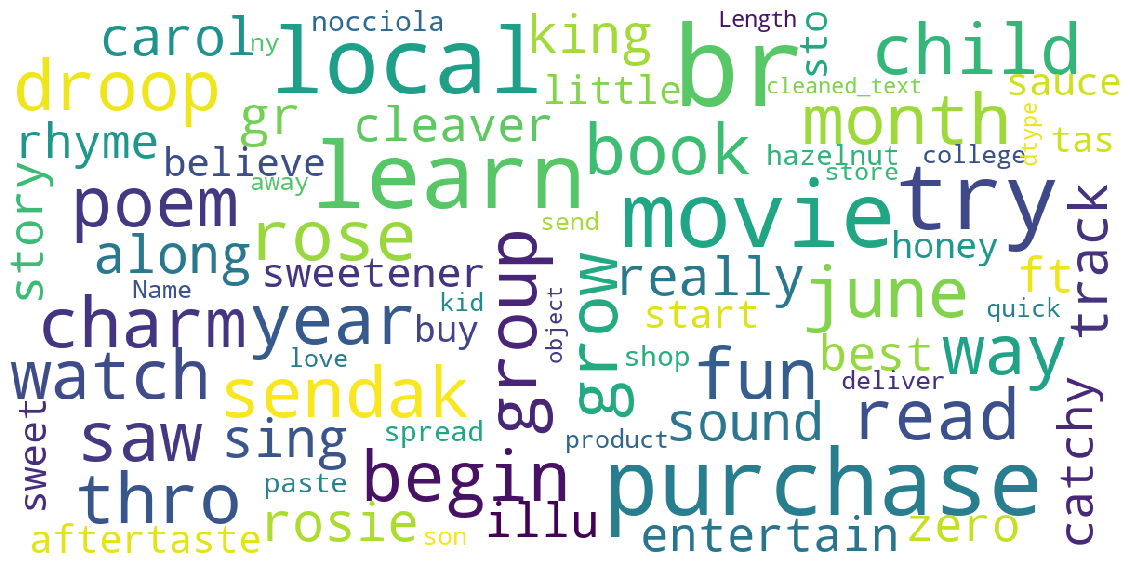

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 100,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(data['cleaned_text'])

**Creating Sentiment Column with the Compound score obtained from SentimentIntensityAnalyzer**

In [24]:
# Focusing only  on 'compound' scores here...
sentimentclass_list = []
for i in range(0, len(data)):
 # current 'compound' score:
    curr_compound = data.iloc[i,:]['compound']
    if (curr_compound <= 1.0 and curr_compound >= 0.55):
        sentimentclass_list.append(5)
    elif (curr_compound < 0.55 and curr_compound >= 0.10):
        sentimentclass_list.append(4)
    elif (curr_compound < 0.10 and curr_compound > -0.10):
        sentimentclass_list.append(3)
    elif (curr_compound <= -0.10 and curr_compound > -0.55):
        sentimentclass_list.append(2)
    elif (curr_compound <= -0.55 and curr_compound >= -1.00):
        sentimentclass_list.append(1)
# Creating a new column here to add the sentiments classification
data['sentiment_class'] = sentimentclass_list

In [26]:
# Backing up the data frame
data.iloc[0:5, :][['compound', 'sentiment_class']]
data.tail()
data.to_csv('Clean_Text_SentimentRating.csv', index=False)

<Figure size 720x360 with 0 Axes>

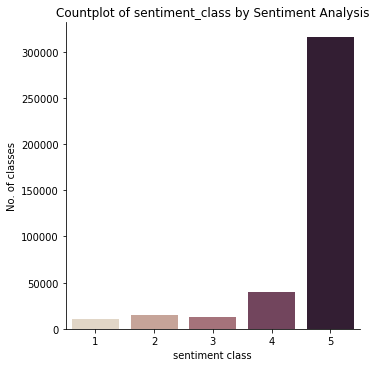

<Figure size 720x360 with 0 Axes>

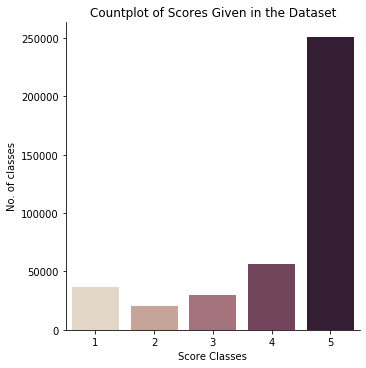

In [147]:
import seaborn as sns
# Distribution of sentiment_class
plt.figure(figsize = (10,5))
sns.set_palette('PuBuGn_d')
sns.catplot(x="sentiment_class", kind="count", palette="ch:.25", data=data)
plt.title('Countplot of sentiment_class by Sentiment Analysis')
plt.xlabel('sentiment class')
plt.ylabel('No. of classes')
plt.show()

plt.figure(figsize = (10,5))
sns.set_palette('PuBuGn_d')
sns.catplot(x="Score", kind="count", palette="ch:.25", data=data)
plt.title('Countplot of Scores Given in the Dataset')
plt.xlabel('Score Classes')
plt.ylabel('No. of classes')
plt.show()

### **Displaying The reviews**

In [28]:
# Display full text:
pd.set_option('display.max_colwidth', -1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [29]:
# Filter 10 negative reviews:
print("10 random negative original reviews and their sentiment classes and their Scores from data set:")
data[(data['sentiment_class'] == 1) | (data['sentiment_class'] == 2)].sample(n=10)[['Text', 'sentiment_class','Score']]


10 random negative original reviews and their sentiment classes and their Scores from data set:


,Text,sentiment_class,Score
335161,"This product does not live up to the slick packaging and promotion of being ""real maple syrup. Greatly disappointed in product. Based on product promotion on Amazon, led to believe that this was ""real maple"" syrup.<br />WRONG!!! Will not buy again. This type of slick packaging dumped onto the buying public is exactly why we as a nation are in the shape we are in to this date.",1,2
113353,"this is one serving. please stop trying to make it seem more healthful than it is. it is very tasteful, but is not as low fat as it seems to be trying to be. when i cannot trust you, who's next? colp",1,3
249608,I have tried several flavours of the Liquid Stevia and must admit that I was disappointed in the Hazelnut flavour or lack of. I use the products in my coffee and while it sweetened the coffee there was no hazelnut flavour.....very bland. Wouldn't buy it again.,1,3
158350,"I really wanted the Havahart Critter Ridder to work, but unfortunately it hasn't helped with our critter problem. We have squirrels around our house daily, and skunk and raccoon that come into our yard every week or so to dig up our ground cover looking for grubs. I have tried repellent sprays and other products before, but nothing seems to deter them. I followed the directions on the Havahart Granular Shaker, and applied it where we most often have a problem. Although we continued to have squirrels appear every day, I was hopeful about keeping the other animals away because nothing happened for about a week. However, after about seven days I awoke to find my ground cover dug up in many of the places where I had applied this repellent. Even if it did work for seven days (which is doubtful because we've gone that long before with no incidents) it would be far to expensive to apply it every week. I won't try this product again.",2,1
367641,"Since I am willing to try alot of new things. I thought that I would buy this product.. And since I do like hot cocoa, I bought 2 boxes.. WORST thing I could have done.. This is bland, with very little flavour. It also has a grainy texture near the bottom of the mug.<br />Personally I will not buy this product again. I will stay with swiss miss or another hot cocoa brand for the Keurig K-Cup",2,1
387026,I've lost weight with this diet with no problems. I like the oat bran but you can buy it cheaper at your grocery store.,2,4
309299,"My cat will go for a day, probably longer, haven't tryed it, but he'll walk right by this stuff every time, even when I know he's hungery. ABSOLUTELY NO INTEREST. I swear he'd rather die of starvation then even take a wiff of it!!",2,2
233299,"I have a small dog with very bad teeth and she runs from a tooth brush. So I rely on these every day. I break them in half and give her a half every morning. Even with bad teeth, she has no trouble chewing them up and she loves them.",1,5
56020,"Very nice company to work with. My first shipment was damaged and they immediately overnighted me a new order.<a href=""http://www.amazon.com/gp/product/B000CCYVTC"">PG Tips 80 Tea Bags</a>",2,5
364809,"Don't be fooled by the packaging labeling this product as ""pad thai""... this is nothing resembling pad thai. The sauce is an awful rendition of some generic Asian flavoring (think a sickly sweet-sour sauce). Nothing close to tasting like pad thai at all, and whatever it does taste like, it tastes horrible. Although the best by expiration date is several months in the future, the peanut topping was rancid. Even for the non-pickiest of eaters, this is quite unpalatable. Would recommend you absolutely avoid this product.",1,1


In [30]:


# Filter 10 neutral reviews:
print("10 random neutral original reviews and their sentiment classes and their score values:")
data[(data['sentiment_class'] == 3)].sample(n=10)[['Text', 'sentiment_class','Score']]


10 random neutral original reviews and their sentiment classes and their score values:


,Text,sentiment_class,Score
312155,"I found this product online after deciding that keeping 7-11 in business single-handedly with my pumpkin latte addiction wasn't the best choice for my wallet. I'd read online that this is the same mix that 7-11 uses-but it's a lie! This mix has much more spice in it (or maybe I just got a bad batch), and since I'm technically allergic to cinnamon, I can't really enjoy this. I'm bummed out because now I have I bunch of unopened tins of the stuff. I'm thinking of making care packages just to give them away.",3,2
59004,We've used this Gluten-Free bread mix since 2005. I use this for basic sandwich bread. I've learned to add one more egg white and decrease the water amount for our bread machine - comes out consistent every time.,3,4
90878,"I hope to use this to make ""tea"". Maybe my fault. Takes a lot of boiling to soften up.",3,3
229278,"I threw the bag out after trying one. I could taste no chocolate, just blah sweetness. Don't waste your money on this.",3,1
215252,"It's tough to find cookie these days not overloaded with sugar. These are just slightly sweet, a bit chewy, yet tasty. Not overloaded with shortening, either. Wish they were more widely available!",3,5
47282,I had expected the peach tea to taste like peach and it does not. Very disappointed.,3,1
44247,"Looking at the ingredients, this has zero pumpkin in it. That is why it's called 'pumpkin style'. It's basically just sugar and preservatives. Addendum: Its now 2008 and I noticed that the ingredient list that used to be available is no longer available...hmm...hiding something???",3,1
199391,The BioBags came in the mail real fast. We have the small bags (black)that are just right for our small dog (20 lbs).,3,4
164904,I found that the amount of tea in the bags were about half the amount that we recieved when we had the same brand and type of tea at a conteninal breakfast. So I got the SHORT bags.,3,1
110887,"Too Watery to be Soup.<br />Nothing there to chew, not even little things.<br /><br />Very Watery.",3,2


In [0]:
# Filter 20 positive reviews:
print("10 random positive Revies and their sentiment classes mapped against their score values:")
data[(data['sentiment_class'] == 4) | (data['sentiment_class'] == 5)].sample(n=10)[['Text', 'sentiment_class','Score']]

20 random positive original tweets and their sentiment classes and their score values:


,Text,sentiment_class,Score
299693,"I'm very strict with my diet. I eat only organic foods, practice CRON (calorie restriction with optimal nutrition), eat minimal carbs and lots of nutrients. I've tested 4 other brands of organic coconut oil -- Nutiva, Spectrum Naturals, and 2 small scale raw food companies. This one is easily the best so far.<br /><br />The aroma is wonderful and the texture is much fuller than the other brands. This coconut oil has fuller taste and less watered-down feeling than the other brands. So if you're looking for a good organic coconut oil, this is the one.<br /><br />Now for some quick facts about how amazingly healthy this stuff is:<br /><br />1) Medium chain fatty acids --> Digest very easily without requiring the gall bladder to do much. Great for people missing gallbladders and truly everyone.<br /><br />2) Converts to usable energy very quickly. A much more balanced and less manic energy than any carbohydrate (fructose, lactose, glucose, etc)<br /><br />3) Anti-viral, anti-parasitic, anti-bacterial, anti-fungal. Keeps your digestive system very clean inside. Helps destroy candida and balance intestinal (probiotic) bacteria. Helps the immune system.<br /><br />4) Longer lasting energy without insulin levels being adversely affected. Fats are the cleanest burning energy for our body. Carbohydrates cause insulin levels to raise and crash, which is what creates the ""eat every 3 hours"" cravings that so many people this is hunger. Healthy fats, like this oil, will not affect insulin and give us much more stable energy that last longer in the body.<br /><br />5) Tastes great. Smells great.<br /><br />6) Can be used topically to make the skin very soft. Is absorbed into the skin to nourish it, unlike most cosmetic moisturizers which leave residue or cause long-term dryness by unbalancing the body's innate skin oil balance.<br /><br />7) Can be used as a sexual lubricant. Coconut oil is a natural anti-viral, anti-fungal, and anti-bacterial lubricant which helps keep these organs clean and reduce the spread of unwanted problem.<br /><br />8) Great for hair and can be used as a leave-on conditioner. Like it's skin use, coconut oil will not imbalance the body's natural oils.... unlike chemical-based conditioners. Plus, because coconut is anti-""everything bad"" it will keep the hair clean too!<br /><br />9) Coconut oil detox cleanse. The medium chain fatty acids make this and ideal food for detox cleanses because the energy is available with minimal digestive effort, plus all of it's anti-""everything bad"" properties. The detox cleanse is a 3 to 7 day process where all carbohydrate foods are removed and coconut oil is eaten as the primary energy source (approx. 14 Tablespoons each day). The oil can be combined with organic lemon water as well. You can find the instructions by Googling ""Natural News Coconut Oil Cleanse"".<br /><br />Basically, coconut oil is amazing! And this brand is the best I've found so far. Enjoy!<br /><br />*** Update: I found a good website for coconut oil information and recipes. It has summaries of many studies on coconut oil. Visit coconutdiet (dotcom)",5,5
9104,"It was impossible to find this product in Santa Maria, CA stores. I needed it in a hurry so ordered from this online supplier. The product was shipped more quickly and arrived before promised...I was a very happy camper. The product itself was beautiful! White! packaged nicely! looked wonderful! Worked great! Now I have to buy more in larger quantities...would buy from here if they had the larger size at a comparable price with competitors.<br /><br />Made some terrific canned apple pie filling...lots of excited compliments on how good it is! Thanks!",5,5
167057,First - The description is WRONG for ingredients. Stubbs does not use high fructose corn syrup in their products. They use all natural ingredients. All Stubb's products are Gluten Free. They are all amazing. We just put a pork roast in the crockpot and pour t

In [55]:
# !pip3 install datetime 

In [54]:
import datetime
from datetime import datetime

data['Time_converted']=data['Time'].apply(lambda col: datetime.utcfromtimestamp(int(col)).strftime('%Y-%m-%d'))

#strftime('%Y-%m-%d %H:%M:%S'))
data['Time_converted_ym']=data['Time'].apply(lambda col: datetime.utcfromtimestamp(int(col)).strftime('%Y-%m')) 

data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text,neg,neu,pos,compound,sentiment_class,Time_converted,Time_converted_ym
0,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,4,1108425600,"Nice cadence, catchy rhymes","In June<br />I saw a charming group<br />of roses all begin<br />to droop<br />I pepped them up<br />with chicken soup!<br />Sprinkle once<br />sprinkle twice<br />sprinkle chicken soup<br />with rice<br /><br />This is a great book to teach children the months of the year. The repetition of the phrases and the funny little stories with accompanying pictures make for an ideal bedtime read. This isn't nearly as good as some of Sendak's other books (like Where the Wild Things are or Pierre: The Boy Who Didn't Care), but it still carries his unique brand of charm.",june<br saw charm group<br rose begin<br droop<br pepped up<br chicken soup!<br sprinkle once<br sprinkle twice<br sprinkle chicken soup<br rice<br br great book teach child month year repetition phrase funny little story accompany picture make ideal bedtime read nearly good sendak's book like wild thing pierre boy care still carry unique brand charm,0.000,0.641,0.359,0.9741,5,2005-02-15,2005-02
1,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,4,1191456000,chicken soup with rice months,This is a fun way for children to learn their months of the year! We will learn all of the poems throughout the school year. they like the handmotions which I invent for each poem.,fun way child learn month year learn poem throughout school year like handmotions invent poem,0.000,0.691,0.309,0.7003,5,2007-10-04,2007-10
2,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,4,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.",grow read sendak book watch really rosie movie incorporates love son love however miss hard cover version paperback seem kind flimsy take two hand keep page open,0.077,0.538,0.385,0.9325,5,2007-11-11,2007-11
3,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,4,1210809600,A classic,"Get the movie or sound track and sing along with Carol King. This is great stuff, my whole extended family knows these songs by heart. Quality kids storytelling and music.",get movie sound track sing along carol king great stuff whole extend family know song heart quality kid storytelling music,0.000,0.756,0.244,0.7003,5,2008-05-15,2008-05
4,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,4,1212278400,Chicken Soup with Rice,"A very entertaining rhyming story--cleaver and catchy.The illustrations are imaginative and fit right in. However, the paperback is somewhat small and flimsy. I'd opt for a bigger edition.",entertain rhyme story--cleaver catchy.the illustration imaginative fit right however paperback somewhat small flimsy i'd opt big edition,0.000,0.758,0.242,0.5859,5,2008-06-01,2008-06


In [56]:
data.isnull().sum()

Id                        0 
ProductId                 0 
UserId                    0 
ProfileName               11
HelpfulnessNumerator      0 
HelpfulnessDenominator    0 
Score                     0 
Time                      0 
Summary                   3 
Text                      0 
cleaned_text              0 
neg                       0 
neu                       0 
pos                       0 
compound                  0 
sentiment_class           0 
Time_converted            0 
Time_converted_ym         0 
dtype: int64

In [57]:
data['Text_lenght']=data['Text'].apply(lambda col: len(col.split(' ')))
data.tail(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text,neg,neu,pos,compound,sentiment_class,Time_converted,Time_converted_ym,Text_lenght
393929,5703,B009WSNWC4,AMP7K1O84DH1T,ESTY,0,0,5,1351209600,DELICIOUS,Purchased this product at a local store in NY and my kids and i love it. Its a quick easy meal. You can put in a toaster oven on toast for 6 min. and its ready to eat.<br />strongly recommend,purchase product local store ny kid love quick easy meal put toaster oven toast min ready eat.<br strongly recommend,0.000,0.496,0.504,0.9217,5,2012-10-26,2012-10,40
393930,327601,B009WVB40S,A3ME78KVX31T21,K'la,0,0,5,1351123200,Tasty!,"I purchased this to send to my son who's away at college. It was delivered right to his dorm room with very fast shipping. He loved it so much he called me to thank me, and sadly, he hardly ever calls me anymore! If you want your kids to call home, and have some good snack to get them through midterms then send them this.",purchase send son who's away college deliver right dorm room fast ship love much call thank sadly hardly ever call anymore want kid call home good snack get midterm send,0.072,0.646,0.282,0.7964,5,2012-10-25,2012-10,65


Text(0.5, 1.0, 'Review length distribution')

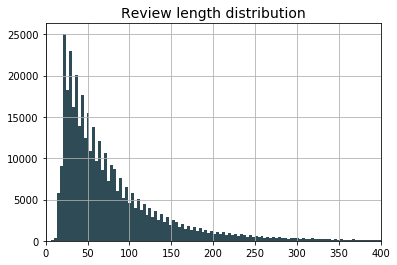

In [58]:
data['Text_lenght'].hist(bins=1000)
plt.xlim(0,400)
plt.title('Review length distribution',fontsize=14)

In [59]:
data.Text_lenght.describe()

count    393931.000000
mean     81.574519    
std      78.643032    
min      3.000000     
25%      35.000000    
50%      58.000000    
75%      100.000000   
max      3526.000000  
Name: Text_lenght, dtype: float64

In [67]:
def score_pos_neg(col):
    
    ''' To club the sentiments into positive neutral and negative sentiments
    '''
    
    if col == 4 or col == 5:
        
        return 'positive'
    elif col == 1 or col == 2:
        
        return 'negative'
    
    else:
        return 'neutral'

data['score_pos_neg']=data['sentiment_class'].apply(score_pos_neg)

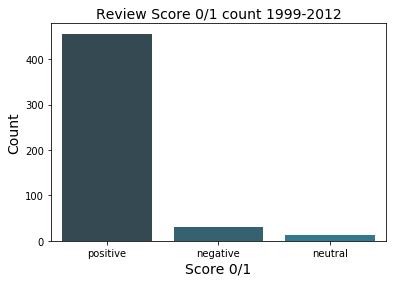

In [75]:
# Checking correct assignments
data[data['score_pos_neg']=='neutral'].head()

#plotting count of positive "1" and negative "0" reviews
sns.countplot(x='score_pos_neg', data=data.sample(500));
plt.xlabel('Score 0/1',fontsize=14);
plt.ylabel('Count',fontsize=14);
plt.title('Review Score 0/1 count 1999-2012',fontsize=14);

### Getting the top reviewers

In [126]:
# TOP Reviewers with count > 10
user_number_review=data.groupby(by=['UserId']).count().sort_values(by=['Text'],ascending=False)

user_number_review.head()

user_top_reviewer=user_number_review[user_number_review['Id']>10][['Id']]
user_top_reviewer.head()

,Id
UserId,
AY12DBB0U420B,329
A3OXHLG6DIBRW8,278
A281NPSIMI1C2R,259
A1YUL9PCJR3JTY,214
A1Z54EM24Y40LL,211


### Review count by top reviewers

Text(0.5, 1.0, 'Review count for top reviewers')

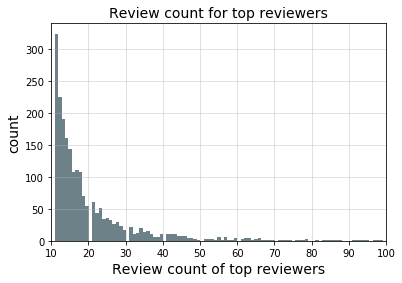

In [129]:
# distribution of review count per user
user_top_reviewer['Id'].hist(bins=350,label='Number of reviews for Top (>10) reviewer',alpha=0.7)
plt.xlabel('Review count of top reviewers',fontsize=14)
plt.ylabel('count',fontsize=14)

plt.grid(linewidth=0.5,alpha=0.75)

plt.xlim(10,100)
plt.title('Review count for top reviewers',fontsize=14)

### *Review Helpfulness and Others*

In [130]:
# getting average data per user
user_average_info=data.groupby(by=['UserId']).mean()
# top_reviewer_avg_data=pd.merge(user_average_info,user_top_reviewer,how='inner',on='UserId')

top_reviewer_avg_data=pd.merge(user_average_info,user_top_reviewer,how='inner',on='UserId')

In [131]:
top_reviewer_avg_data['ratio_helpful']=top_reviewer_avg_data['HelpfulnessNumerator']/top_reviewer_avg_data['HelpfulnessDenominator']

In [132]:
top_reviewer_avg_data.head()
top_reviewer_avg_data['Time_converted']=top_reviewer_avg_data['Time'].apply(lambda col: datetime.utcfromtimestamp(int(col)).strftime('%Y-%m'))
top_reviewer_avg_data=top_reviewer_avg_data[(top_reviewer_avg_data['ratio_helpful']>0.0) & (top_reviewer_avg_data['ratio_helpful']<1.0)]

colors = np.random.rand(top_reviewer_avg_data.shape[0])
top_reviewer_avg_data.head()

,Id_x,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,neg,neu,pos,compound,sentiment_class,Text_lenght,Id_y,ratio_helpful,Time_converted
UserId,,,,,,,,,,,,,,
A100WO06OQR8BQ,297965.457143,0.800000,1.771429,3.628571,1.310732e+09,0.063457,0.724857,0.211629,0.621294,4.371429,160.142857,35,0.451613,2011-07
A1051DBTLWP5A2,257925.294118,1.529412,1.588235,4.411765,1.322555e+09,0.069882,0.647765,0.282235,0.915547,4.941176,192.647059,17,0.962963,2011-11
A105S56ODHGJEK,323189.214286,0.142857,0.428571,3.571429,1.302480e+09,0.049571,0.658143,0.292071,0.882264,4.857143,149.857143,14,0.333333,2011-04
A106ZCP7RSXMRU,279473.121212,4.121212,4.515152,4.484848,1.220497e+09,0.042091,0.585394,0.372485,0.947055,5.000000,119.818182,33,0.912752,2008-09
A1076UA29SK59D,179163.363636,0.454545,0.545455,4.181818,1.331023e+09,0.035182,0.651545,0.313273,0.767473,4.636364,104.818182,11,0.833333,2012-03


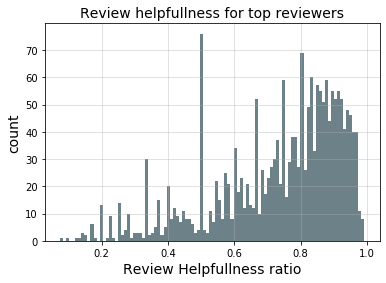

In [133]:
# review helpfulness distribution
top_reviewer_avg_data['ratio_helpful'].hist(bins=100,label='review helpfullness top reviewers',alpha=0.7);

plt.xlabel('Review Helpfullness ratio',fontsize=14);
plt.ylabel('count',fontsize=14);

#plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Review helpfullness for top reviewers',fontsize=14);
plt.savefig('helpfullness_top_reviewer_dist.png')

#### Majority find the top reviewers helpful

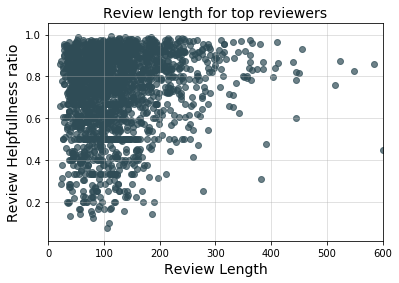

In [134]:
# review length vs helpfulness
plt.scatter(top_reviewer_avg_data['Text_lenght'],top_reviewer_avg_data['ratio_helpful'],alpha=0.7);
plt.xlim(0,600);
plt.xlabel('Review Length',fontsize=14);
plt.ylabel('Review Helpfullness ratio',fontsize=14);
#plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Review length for top reviewers',fontsize=14);
plt.savefig('helpfullness_top_reviewer_length.png')

#### Users generally find top reviewer with more than 200 words length review helpful, longer review better feedback

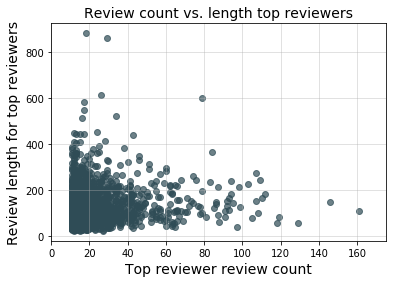

In [135]:
#revire count of top reviewers vs. review length
plt.scatter(top_reviewer_avg_data['Id_y'],top_reviewer_avg_data['Text_lenght'],alpha=0.7); #,c=top_reviewer_avg_data['ratio_helpful'])
plt.xlim(0,175);

plt.xlabel('Top reviewer review count',fontsize=14);
plt.ylabel('Review length for top reviewers',fontsize=14);

#plt.legend()
plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Review count vs. length top reviewers',fontsize=14);
plt.savefig('helpfullness_top_reviewer_length_count.png')

#### - The top reviewers that write more often do not write very long paragraphs above 200 words, while those that write longer have less than 20-30 review

In [156]:
pos=data[data['score_pos_neg']=='positive']
neg=data[data['score_pos_neg']=='negative']
neu=data[data['score_pos_neg']=='neutral']


grp_date_pos=pos.groupby(by=['Time_converted_ym']).count();
grp_date_neg=neg.groupby(by=['Time_converted_ym']).count();
grp_date_neu=neu.groupby(by=['Time_converted_ym']).count();


grp_date_pos.reset_index(inplace=True);
grp_date_neg.reset_index(inplace=True);
grp_date_neu.reset_index(inplace=True);


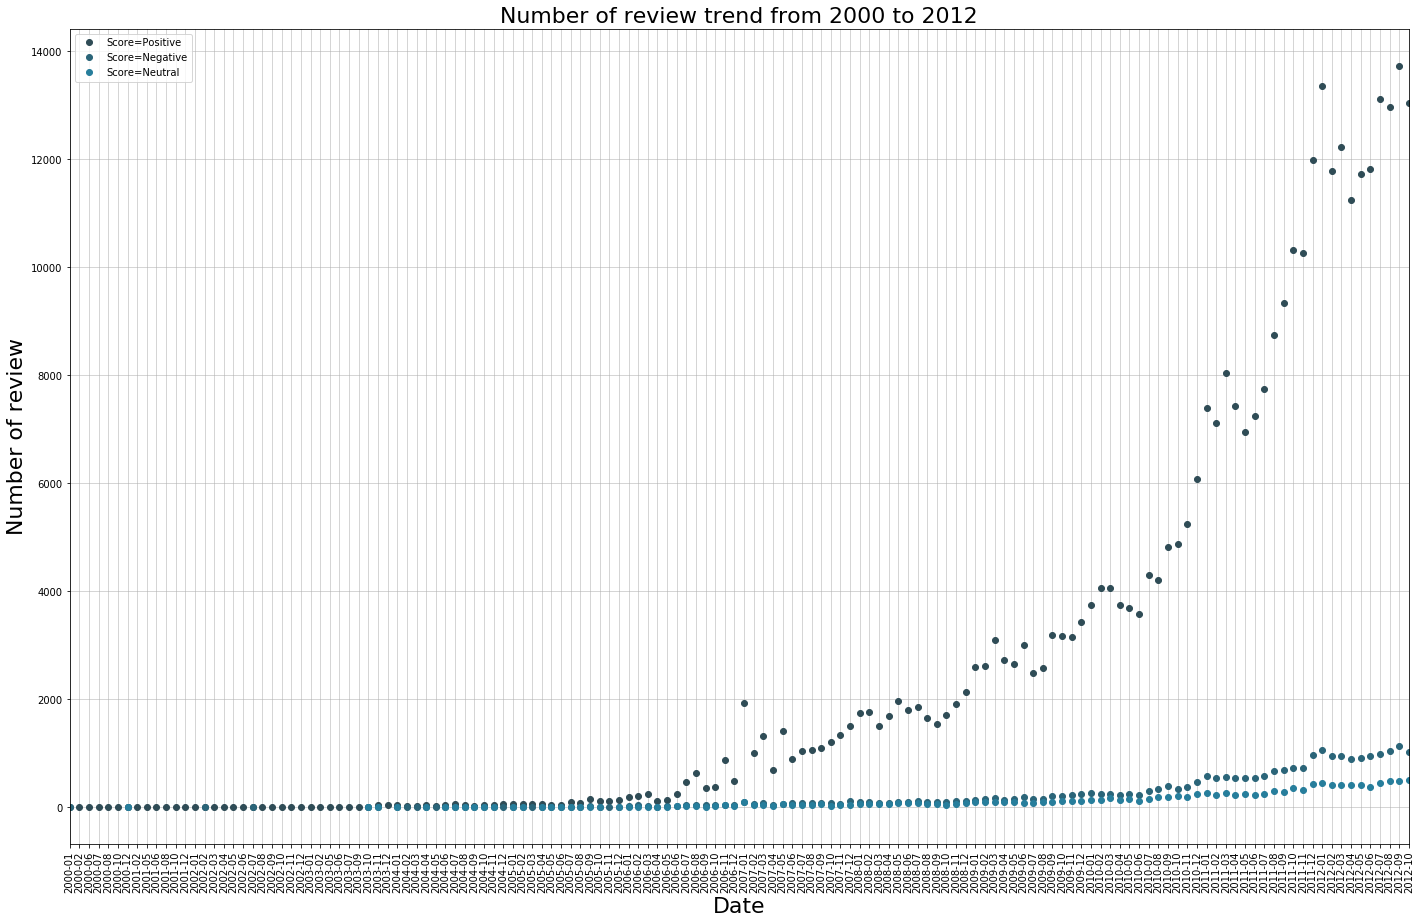

In [164]:
# review count by score for each month from 2000 to 2012
plt.figure(figsize=(24,15))

plt.plot_date(x=grp_date_pos['Time_converted_ym'],y=grp_date_pos['score_pos_neg'],label='Score=Positive');
plt.plot_date(x=grp_date_neg['Time_converted_ym'],y=grp_date_neg['score_pos_neg'],label='Score=Negative');
plt.plot_date(x=grp_date__neu['Time_converted_ym'],y=grp_date_neu['score_pos_neg'],label='Score=Neutral');
plt.xticks(rotation=90);
plt.legend()
plt.grid(linewidth=0.7,alpha=0.75)
plt.xlim('2000-01','2012-10');
plt.xlabel('Date',fontsize=22)
plt.ylabel('Number of review',fontsize=22)
plt.title('Number of review trend from 2000 to 2012',fontsize=22);

- The trend start to change suddenly after 2006, There is a huge boost in scores specially in 5, this seems a bit unusual.
    * possibly there are unverified accounts that are boosting the seller inappropriately with fake reviews.


In [166]:
data.to_csv('eda_final.csv')